# 분류

학습 데이터로 주어진 데이터의 Feature와 Label값을

머신러닝 알고리즘으로 학습하여 모델을 생성.

모델에 새로운 값이 주어졌을 때 미지의 Label값 예측.

- 알고리즘 종류
    - 나이브 베이즈
    - 로지스틱 회귀
    - 결정 트리
    - 서포트 벡터 머신
    - 최소근접 알고리즘(KNN)
    - 심층 연결 기반의 신경망(NN)
    - 앙상블(XGBoost, LightBGM)

## 결정트리

IF/ELSE 기반으로 분류.

규칙이 많을수록 결정 방식이 복잡해지며 과적합 우려 상승. 예측성능 저하 가능.

- 결정 노드
    - 규칙을 지정한 노드.
    - 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 제정.
    - 조건에 맞춰 균일도가 높은 데이터셋 생성. 이로부터 트리 시작.
    - 균일도 측정 방법
        - 정보이득 : 1 - 엔트로피 지수. 서로 다른 값이 섞여있으면 엔트로피(주어진 데이터 집합의 혼잡도)가 높음.
        - 지니계수 : 0에서 평등 1에서 불평등. 지니계수가 낮을수록 데이터 균일도가 높은 것으로 해석. 지니계수가 낮은 속성을 기준으로 분할.

- 장점
    - 균일도를 기반으로 하여 알고리즘이 쉽고 직관적.
    - 규칙/리프 노드의 정보와 시각화까지 명확하게 학습 가능.
    - 각 Feature 스케일링 및 정규화같은 전처리과정 필요없음.
    
- 단점
    - 과적합으로 정확도가 떨어짐.
    - 트리 크기를 제한하는 튜닝 필요.
    
    
- 사이킷런(sklearn)
    - DecisionTreeClassifier
    - DecisionTreeRegressor
    - 둘 모두 동일한 파라미터 사용.
    - 파라미터
        - min_samples_split : 노드 분할을 위한 최소 샘플 데이터 수. 과적합 제어. Default = 2.
        - min_samples_leaf : 말단 노드까지 최소 샘플 데이터 수. 과적합 제어.
        - max_features : 최대 피처 개수. Default = None. int형(개수), float형(퍼센트), sqrt(=atuo), log2 가능.
        - max_depth : 트리의 최대 깊이. Default = None. min_samples_split보다 작아질 때 까지 계속 깊이 증가.
        - max_leaf_nodes : 말단 노드의 최대 개수.

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# Iris DataSet 학습/테스트 DataSet으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

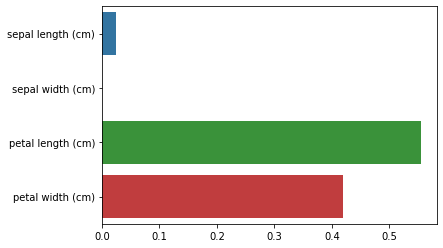

In [39]:
# Feature별 중요도 값 매핑 후 시각화


import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# Visualization
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

## 예제 - Human Activity Recognition

In [40]:
# features.txt - feature_name, feature_index 공백으로 분리.


import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Change Deractory
os.chdir('C:/AIP/python_workspace/venv/All Scripts/Machine Learning/Dataset/UCI HAR Dataset/UCI HAR Dataset')


# features.txt Load.
feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])


# 중복된 feature_name 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [41]:
# 중복된 feature_name 에 _1 과 같은 숫자 추가하여 컬럼 새로 생성.
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test



X_train, X_test, y_train, y_test = get_human_dataset()
print('학습 피처 데이터셋 info : \n')
print(X_train.info())

학습 피처 데이터셋 info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [14]:
# DecisionTreeClassifier 동작 예측 분류
# 하이퍼 파라미터 모두 디폴트 설정.


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=156)


# Data Fit & Predict
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8548


In [16]:
# max_depth가 예측 정확도에 주는 영향
# GridSearchCV 사용하여 max_depth 조절.


from sklearn.model_selection import GridSearchCV


# GridSearchCV 파라미터 생성
params = {'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]}


# GridSearchCV 객체 생성
# 측정방법 = 정확도(accuracy)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )


# Model Fit
grid_cv.fit(X_train , y_train)


# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)


# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.3min finished


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [17]:
# max_depth가 16일 때 accuracy 85.13%로 도출.
# 즉 16을 넘어가는 순간 과적합으로 정확도 하락.
# 이번엔 max_depth와 min_samples_split을 같이 변경하며 정확도 측정.


params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [18]:
# max_depth가 8, min_samples_split이 16일 때 가장 높은 정확도(85.49%)를 출력.
# 해당 파라미터값을 가져가서 데이터세트 예측 수행.


# best_estimator : 위에서 학습한 최적 파라미터로 학습 완료한 객체.
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


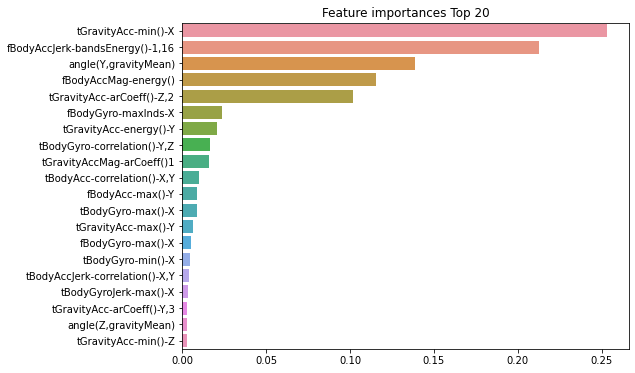

In [19]:
# 위에서 학습한 최적 파라미터를 적용한 모델에서
# 각 Feature의 중요도를 feature_importacne를 이용하여 출력.


import seaborn as sns

# 막대그래프로 표현하기 위해 Series변환 후 중요도 값 순으로 정렬
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

##### 상위 5개 Feature가 가장 높은 중요도 시각화 완료.
##### 분류를 통해 각 Feature가 규칙 생성에 영향을 미치는 중요도 확인 가능.

# 
# 
# 
# 앙상블(Ensemble)

여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합하는 방법.

보다 정확한 최종 예측값을 도출.

- 학습유형
    - 보팅 / 배깅 / 부스팅
    - 보팅과 배깅은 여러 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.
    - 보팅 : 서로 다른 알고리즘 분류기 결합
    - 배깅 : 각 분류기의 알고리즘 동일. 다른 데이터 샘플링 학습. 이를 통해 보팅 수행. (대표 = 랜던포레스트)

##### 
## 보팅(Voting)

- 유형
    - 하드보팅(Hard Voting)
        - 다수결의 원칙.
        - 다수의 분류기가 결정한 예측값을 최종 결과값으로 선정.
    - 소프트보팅(Soft Voting)
        - 각 분류기의 Label값 결정 확률의 평균 계산.
        - 가장 학률이 높은 Label값을 최종 결과값으로 선정.
        - 일반적으로 사용되는 보팅 기법.
        
- 사이킷런 앙상블의 VotingClassifier 클래스로 사용

In [21]:
# Voting 방식 사용하여 위스콘신 유방함 데이터 세트 예측 분석.
# 로지스틱 회귀, KNN기반 VotingClassifier 생성.


import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# DataSet 객체 생성
cancer = load_breast_cancer()

# DataSet DataFrame 변환
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# 로지스틱 회귀 / KNN 객체 생성 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)


# Soft Voitng 기반 모델 분류 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )


# DataSet 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)


# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


[추론]

Voting 분류기의 정확도가 각 분류기의 정확도보다 높게 측정됨.

늘 이러한 결과를 가져오는 것이 아니라는 점을 알아야 함.

데이터 특성, 분포 등 다양한 요건에 결과가 다르기 때문.

##### 
## 배깅(Bagging)

- 개념
    - 같은 알고리즘으로 여러 분류기 생성.
    - 다른 데이터셋 학습.
    - 각 분류기 예측값에 대해 보팅(Voting). 최종 결과값 선정.

- 알고리즘
    - 기반 알고리즘 : 결정트리(DicisionTree)
    - 대표 알고리즘 : 랜덤포레스트(RandomForest)

- 부트스트래핑(Bootstrapping)
    - 여러 개의 데이터셋을 중첩되게 분리하는 것.
    - n_estimators 파라미터를 통해 분리.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# get_human_dataset( )을 사용하여 Traion/Test DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()


# RandomForestClassifier 객체 생성
rf_clf = RandomForestClassifier(random_state=0)


# DataSet Fit & Predict
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [24]:
# 이번엔 다양한 파라미터를 튜닝하여 적용.
# 튜닝 시간 절약을 위해 estimators = 100 설정.
# n_jobs = -1 은 CPU코어 학습을 위해 적용.


params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}


# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)


print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [25]:
# 해당 DataSet 학습을 통해 도출한 최적의 파라미터 적용.
# n_estimators를 300으로 정정하여 예측.


# RandomForestClassifier 객체 생성 후 Fit & Predict
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


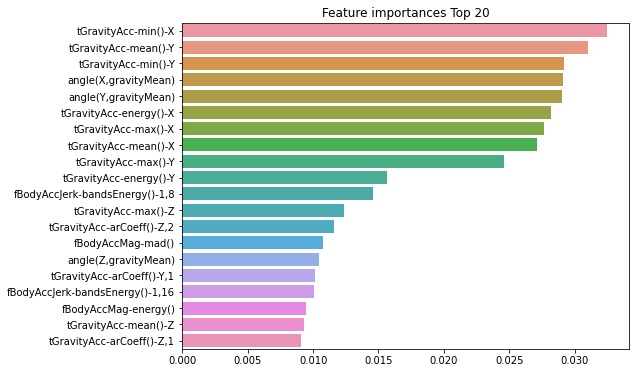

In [26]:
# 결정 트리 방법이니만큼 feature_importances_ 속성 사용하여
# Feature 중요도 시각화하여 측정.


ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

[추론]

RandomForestClassifier 모델을 학습하여 도출한 예측 결과에

각 Feature들이 예측 결과에 어느정도 영향을 미치는지 중요도에 대한 결과가

DecisionTreeClassifier 에 비해 많은 Feature들의 중요도가 상승했음을 알 수 있다.

즉, 더 다양한 Feature로부터 예측 결과를 나타내었으므로

정확도(accuracy)가 상승했음을 알 수 있다. 

##### 
## GBM(Gradient Boosting Machine)

- 개념
    - 부스팅 알고리즘.
    - 여러 개의 약한 학습기를 순차적으로 학습-예측 반복.
    - 잘못 예측한 데이터에 가중치를 부여하며 오류를 개선.
    - 경사하강법(Gradient Descent)


- 대표 알고리즘 : AdaBoost(Adaptive Boosting)

- 사이킷런 GradientBoostingClassifier 클래스

In [28]:
# GBM 사용하여 Human Activity DataSet 학습.
# GBM으로 학습하는 시간 측정


from sklearn.ensemble import GradientBoostingClassifier
import time


# 미리 생성한 함수로 DataSet 설정.
X_train, X_test, y_train, y_test = get_human_dataset()


# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()


# GBM 객체 생성
gb_clf = GradientBoostingClassifier(random_state=0)


# DataSet Fit & Predict
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)


print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 573.0 초 


일반적으로 GBM이 RandomForest보다 예측 성능 우월.

단 오랜 학습시간 및 파라미터 튜닝이 복잡.

- 파라미터 튜닝
    - loss : 경사하강법에서 사용할 비용함수. Default = 'deviance'
    - learning_rate : 오류값을 순차적으로 보정해나가는 데 적용하는 계수. Deafult = 0.1
    - n_estimators : weak learner 개수. Default = 100
    - subsmaple : 학습 시 사용하는 데이터 샘플링 비율. Default = 1
    


In [32]:
# 파라미터 튜닝을 통해 예측 재실시.


params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}


# GridSearchCV 객체 생성 및 DataSet 학습 
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 112.4min finished


수행 시간: 64520.2 초 
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9011


In [33]:
# learning_rate가 0.1, n_estimators가 500일 때 최고 정확도 출력.
# 해당 튜닝 그대로 적용하여 예측 수행.

gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9420


이제껏 수행했던 예측모델 중 가장 높은 정확도() 출력.

GBM은 과적합에도 강하며 뛰어난 예측 결과를 도출.

단 수행 시간이 오래걸리는 단점 존재.

##### 
## XGBoost(eXtra Gradient Boost)
트리 기반 앙상블 학습에서 가장 각광받는 알고리즘.

GBM 기반. 느린 수행시간 단점 및 과적합 규제 해결.

- 파라미터
    - 일반 파라미터
        - booster : gbtree / gblinear. Default = gbtree
        - silent : 메시지 출력 여부 설정. Default = 0
        - nthread : CPU 실행 쓰레드 개수. Default = all thread
    - 부스트 파라미터
        - eta : GBM learing_rate와 같은 파라미터. Default = 0.3
        - num_boost_rounds : GBM n_estimators와 같은 파라미터.
        - min_child_weight : 트리에 가지를 추가할지 결정하기 위해 필요한 데이터들의 weight 총합. 클수록 분할 자제. 과적합 조절.
        - gramma : 트리의 리프 노드를 추가적으로 나눌지 결정.
        - max_depth : 트리 기반 알고리즘 max_depth와 동일. 0 지정할 시 깊이 제한 없음. Default = 6
        - sub_sample : GBM의 subsmaple과 동일. 데이터 샘플링 비율 지정. 0.5로 지정할 시 절반 데이터만 사용.
        - colsmaple_bytree : GBM max_feature와 유사. 트리 생성에 필요한 Feature를 임의로 샘플링.
        - lambda : L2 규제 적용 값. 값이 클수록 과적합 감소 효과.
        - alpha : L1 규제 적용 값. 값이 클수록 과적합 감소 효과.
        - scale_pos_weight : 특정 값으로 치우친 비댗이 클래스로 구성된 데이터 세트의 균형 유지.
    - 학습 태스크 파라미터
        - objective : 최소값을 가질 손실함수 정의
        - binary_logistic : 이진분류 적용
        - multi_softmax : 다중분류 적용
        - multi_softprob : multi_softmax와 유사. 개별 Label 클래스의 예측 확률 반환.
        - eval_metric : 검증에 사용될 함수. Default = RMSE(회귀) / ERROR(분류)

- 만약 과적합 문제가 심각할 경우 다음과 같이 적용
    - 1. eta값 낮추기. num_round 높이기.
    - 2. max_depth값 낮추기.
    - 3. min_child_weight값 높이기
    - 4. gamma값 높이기
    - 5. subsmaple, colsample_bytree 조정하기.
    
- XGBoost 자체적으로 교차검증 / 성능평가 / 피처중요도 등 시각화 기능 소유.

#### Python Wrapper XGBoost

In [46]:
# 위스콘신 유방암 데이터 세트 활용하여 XGBoost API 사용법 학습.
# 종양의 크기, 모양 등 다양한 속성값을 기반으로 악성 / 양성 종양 분류.


import xgboost as xgb
from xgboost import plot_importance
from sklearn.datasets import load_breast_cancer


# Load DataSet
dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target


# DataSet to DataFrame
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [47]:
# Target Label 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts(), '\n')


# Train / Test DataSet 분리
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156 )
print('Shape : ', X_train.shape , X_test.shape)


# Python XGBoost는 DataSet 분리 과정에서 DMaxtirx 생성.
# Data와 Label 입력값을 받아 만들어지는 XGBoost 전용 DataSet.
# DataFrame을 사용할 경우 DataFrame.values 이용하여 Numpy로 일차 변환한 뒤 DMaxtrix 변환 적용.
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64 

Shape :  (455, 30) (114, 30)


In [48]:
# XGBoost 학습 데이터 수행을 위해 파라미터 튜닝.


params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400


# XGBoost는 반복마다 eval_set으로 지정된 DataSet에서 eval_metric의 평가지표로 오류 예측.
# eval_set은 성능평가 수행할 평가용 DataSet 지정.
# eval_metric은 평가 세트에 적용할 평가방법 적용.
# 분류의 경우 주로 error, logloss 적용.
# 조기중단을 위해 eval DataSet 별도로 이름 명명.
wlist = [(dtrain,'train'),(dtest,'eval') ]



# XGBoost 조기중단 기능 사용.
# 수행 성능 개선을 위해 num_boost_round 횟수 채우기 전에 earyly_stopping_rounds 횟수로 조기중단.
# 
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.60969	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18

In [49]:
# train으로 학습 수행 결과 train_error와 eval_logloss 지속적 감소 확인.
# 학습이 완료된 해당 모델 이용하여 예측 수행.


# sklearn predict()는 예측 결과 값(0, 1) 반환하는데 비해
# XGBoost predict()는 예측 결과 값이 아닌 예측 결과를 추정할 수 있는 확률 반환. 
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))


# 악성/양성 판단하는 이진분류.
# 예측 확률이 0.5 보다 크면 1 , 아니면 0 으로 예측값 결정하여 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

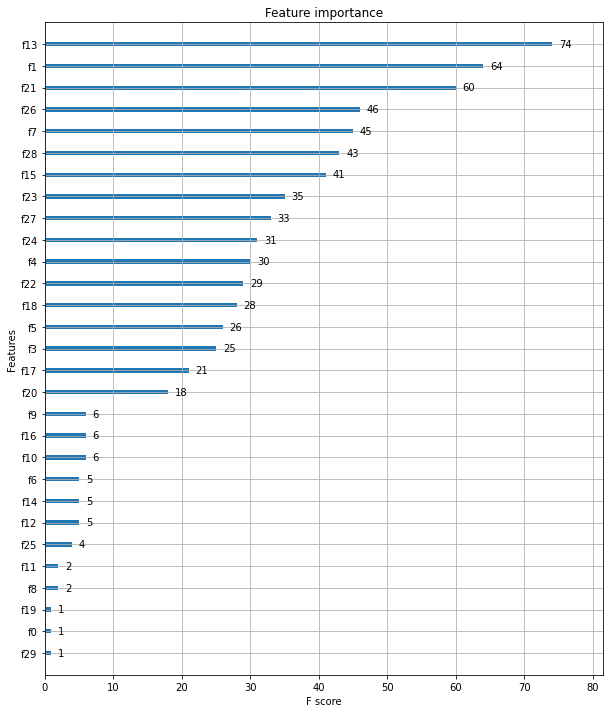

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    
# get_clf_eval() 함수를 통해 XGBoost 모델 예측 성능 평가.
get_clf_eval(y_test, preds, pred_probs)


# XGBoost 패키지에 내장된 시각화 기능 수행.
# plot_importance() API 사용하면 피처의 중요도를 막대 그래프 형식으로 출력.
# 단 feaure_name을 정확히 알 수 없음. f0, f1, f2 ... 로 나열.
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

#### Sklearn Wrapper XGBoost

- sklearn Estimator를 상속했기 때문에 fit(), predict()로 학습과 예측 가능.
- GridSearchCV, Pipeline 등 sklearn 유틸리티 그대로 사용 가능.
- XGBClassifier(분류), XGBRegressor(회귀) 로 나뉘어짐.
- 하이퍼 파라미터
    - eta -> learning_rate
    - sub_sample -> subsample
    - lambda -> reg_lambda
    - alpha -> reg_alpha
    - n_estimators == num_boost_round
    

In [52]:
# 위스콘신 유방암 데이터 세트 활용.
# n_estimators(= num_boost_round) 400, learning_rate 0.1, max_depth 3 설정

from xgboost import XGBClassifier


# XGBClassifier 객체 생성
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)


# train DataSet Fit & Predict
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]


# 생성된 모델 예측 성능 평가
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [53]:
# Python Wrapper XGBoost와 동일한 결과 도출.
# 조기중단 파라미터 설정
    # early_stopping_rounds 100, eval_metric logloss, eval_set 설정.
    # fit()에 해당 파라미터 설정.


# evals 생성 및 조기 중단 파라미터 적용하여 Fit & Predict
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-loglo

In [54]:
# 400번 모두 수행하지 않고 조기 중단한 이유
# 211번 반복한 logloss = 0.08559
# 311번 반복한 logloss = 0.08595
# 100번 반복할 동안 성능 평가 지수가 크게 향상되지 않았기에 반복 중단.


# 해당 모델의 예측 성능 측정
get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [55]:
# 조기 중단값이 급격하게 줄어들면 어떠한 상황이 발생하는지 테스트


# early_stopping_rounds = 10 으로 설정.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)


# DataSet Fit & Predict
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]


# 모델 에측 성능 측정
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-loglos

[추론]

조기 중단 100회 모델의 정확도 = 0.9649

조기 중단 10회 모델의 정확도 = 0.9561

즉 정확도가 떨어질 수 있다.

# 
# 
# 
# LightGBM

- XGBoost의 긴 학습시간 단점을 보완한 알고리즘.
- 예측 성능은 별다른 차이 없음.
- 기능 다양도는 LightGBM이 더 많음.
- 단점 : 적은 DataSet 적용할 경우 과적합 발생.
    
일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식 사용.

트리의 균형을 맞추지 않고, 최대손실값(Max_delta_loss)을 갖는 리프 노드를 지속적으로 분할.

생성된 깊고 비대칭한 트리를 학습하므로서 예측 오류 손실 최소화.

- 주요 파라미터
    - num_iterations : 반복 수행할 트리 개수 지정. 크게 지정할수록 예측값 상승. 너무 크면 과적합. Default = 100
    - learning_rate : 학습률 값. Default = 0.1
    - max_depth : Default = -1
    - min_data_in_leaf : 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. Dafault = 20
    - num_leaves : 하나의 트리가 가질 수 있는 최대 리프 개수. Default = 31
    - boosting : 부스팅 트리 생성 알고리즘. gbdt(Default)/rf
    - bagging_faction : Data sampling 비율 지정. Default = 1.0
    - feature_fraction : 개별 트리 학습할 때 무작위로 선택하는 피처 비율. Default = 1.0
    - lambda_l1 / lambda_l2 : L1, L2 규제 적용.
- Learing Task 파라미터
    - objective : 최소값을 가져야 할 손실함수 정의.

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

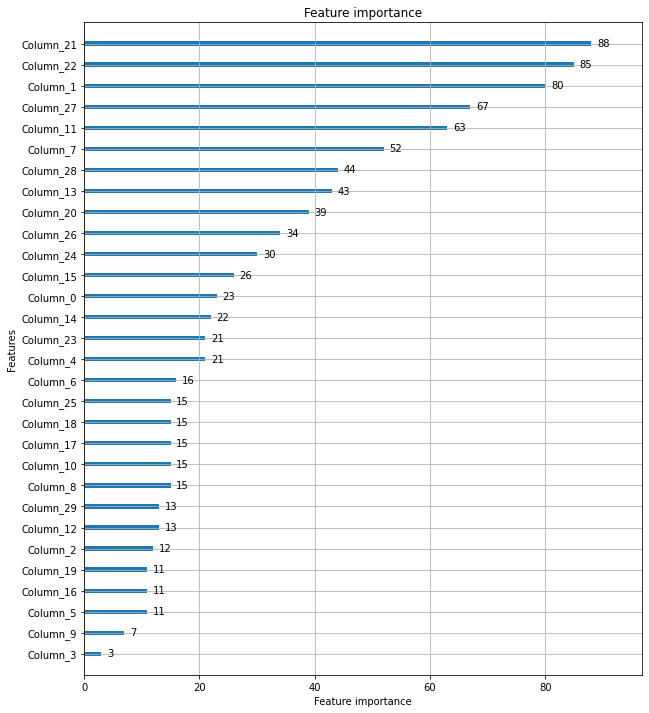

In [59]:
# 위스콘신 유방암 데이터 세트 활용하여 LightGBM 학습.
from lightgbm import LGBMClassifier
from lightgbm import plot_importance


dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target


# train/test DataSet 분리
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )


# LightGBM 객체 생성.
# XGBoost 에제와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)


# DataSet Fit & Predict
# XGBoost와 동일하게 조기 중단 설정.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]


# 해당 모델 예측 성능 측정
get_clf_eval(y_test, preds, pred_proba)


# 각 Feature 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

[추론]

정확도 95.61% 로 XGBoost 정확도 96.49% 보다 조금 낮은 수치.

하지만 학습속도가 빠르고 알고리즘 간 성능 비교 큰 차이 없음.

plot_importance() 경우 XGBoost와 동일하게 feature_name 알 수 없도록 출력.

다만 XGBoost와 다르게 f_숫자 가 아닌 Column_숫자 로 표시.

# 
# 
# 
# 스태킹 앙상블(Stacking Ensemble)

- 여러 알고리즘을 서로 결합하여 예측 결과를 도출.
- 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측 수행.
- 메타 모델 : 개별 모델의 예측 데이터 세트를 기반으로 다시 학습하고 예측하는 방식
- 두 종류 모델 필요
    - 기반 모델
    - 메타 모델

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


# 위스콘신 암 데이터 세트
cancer_data = load_breast_cancer()


# Data 선언
X_data = cancer_data.data
y_label = cancer_data.target


# DataSet 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [63]:
# 개별 기반 모델 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)


# 최종 Stacking 모델 Classifier생성. 
lr_final = LogisticRegression(C=10)


# 개별 모델 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)


# 학습된 개별 모델이 반환하는 예측 데이터 셋을 생성 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)


# 개별 모델 정확도 측정.
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [65]:
# 예측 값을 Column으로 만들어 재사용
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])


# 예측 데이터 반환값이 1차원 ndarray 이므로
# 예측 결과를 행으로 붙인 뒤 transpose 사용하여 예측결과를 Feature로 제작.
pred = np.transpose(pred)
print(pred.shape)


# 예측 DataSet을 기반으로 최종 메타모델(로지스틱 회귀) Fit & Predict
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

(114, 4)
최종 메타 모델의 예측 정확도: 0.9649


[추론]

최종 메타 모델의 정확도 96.5%로 

개별 모델 정확도보다 향상된 값 도출.

단, 해당 모델에도 과적합 문제가 발생할 수 있기에

이를 피하기 위해 CV세트 기반 스태킹 모델 사용.

# 
# CV Set Stacking Model

- 과적합을 개선하기 위해 최종 메타 모델 데이터 세트 제작 시

- 교차 검증 기반으로 예측된 결과 데이터 세트 사용.

- 개별 모델 각각 교차 검증. Train_stacking_data, Test_stacking_data 생성.

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반모델에서 Train_stacking_data, Test_stacking_data 생성 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    
    
    # KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    
    # Numpy Array 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 기반모델이 Fit & Predict 할 Fold_DataSet 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        
        # 위에서 생성한 Fold_DataSet으로 Fit & Predict
        model.fit(X_tr , y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
            
    # 원본 test_data를 예측한 데이터 평균을 Test_stacking_data로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [67]:
# 분류모델별 stack_base_model() 함수 수행.
# 각 모델 별 train/test DataSet 반환.
# 반환된 DataSet을 추후 메타모델이 사용.
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [68]:
# 반환된 train/test DataSet을 합치는 과정.
# Numpy concatenate() 사용하여 각 모델별 반환된 DataSet 합성.
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [69]:
# 생성된 DataSet로 메타모델 Fit & Predict
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


# 분류실습
## - Kaggle Santander Customer Satisfaction
## - Kaggle Credit Card Fraud Detection